In [1]:
# Salary estimation using K-NEAREST NEIGHBOUR (ML)

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np

In [3]:
# Choose dataset from github
dataset = pd.read_csv("https://raw.githubusercontent.com/Vinothkumarkumar/Projects/main/1.%20Machine%20Learning/1.2%20Salary%20estimation%20using%20K-NEAREST%20NEIGHBOUR/salary.csv")

In [4]:
# Summarize the dataset
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [5]:
# Mapping income value into binary value
income_set = set(dataset["income"])
dataset['income'] = dataset['income'].map({'<=50K' : 0, '>50K' : 1}).astype(int)
print(dataset.head(5))

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


In [6]:
# Segregate Dataset in to X, Y
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [7]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [8]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Mean Error')

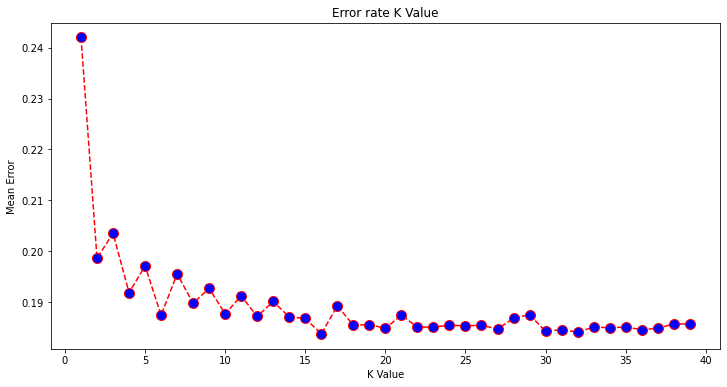

In [13]:
# Finding the best K-Value

error =[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred_i= model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color ='red', linestyle = 'dashed', marker = 'o', markerfacecolor='blue', markersize=10)
plt.title('Error rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [14]:
# Traning the model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p= 2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=16)

In [17]:
# Predicting, Wheather new Employee will get or not
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Capital Gain: "))
wh = int(input("Enter New Employee's Hours per Week: "))

newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
    print('Employees might got salary above 50K')
else:
    print('Employees might not got salary above 50K')

Enter New Employee's Age: 68
Enter New Employee's Education: 9
Enter New Employee's Capital Gain: 0
Enter New Employee's Hours per Week: 40
[0]
Employees might not got salary above 50K


In [18]:
# Prediction for all data
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [19]:
# Evaluating Model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

print("confusion_matrix: ")
print(cm)

print("Accuracy of the model :{0}%".format(accuracy_score(Y_test,Y_pred)*100))

confusion_matrix: 
[[5882  311]
 [1185  763]]
Accuracy of the model :81.62387913032796%
